In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Emotion Detection.ipynb', 'test', 'train']

In [3]:
height=48
width=48
batch_size=32
train_data='train/'
test_data='test/'

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                shear_range=0.3,
                                zoom_range=0.3,
                                horizontal_flip=True,
                                fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_data,
                                                  color_mode='grayscale',
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)
validation_generator=validation_datagen.flow_from_directory(test_data,
                                                  color_mode='grayscale',
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)
                                                

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
img,label=train_generator.__next__()

In [8]:
img.shape

(32, 48, 48, 1)

In [9]:
from random import randint as rd

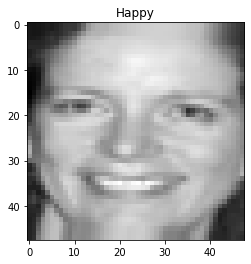

In [25]:
i=rd(0,(img.shape[0])-1)
image=img[i]
lab1=class_labels[label[i].argmax()]
plt.imshow(image[:,:,0],cmap='gray')
plt.title(lab1)
plt.show()

In [31]:
num_train_imgs=0
for root,dirs,files in os.walk('train/'):
    num_train_imgs+=len(files)
num_test_imgs=0
for root,dirs,files in os.walk('test/'):
    num_test_imgs+=len(files)

In [49]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(7,activation='softmax'))


In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [51]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 10, 10, 128)      

In [73]:
epoch=50
model.fit(x=train_generator,epochs=25,validation_data=validation_generator,steps_per_epoch=num_train_imgs//batch_size,validation_steps=num_test_imgs//batch_size)

Epoch 1/25
107/897 [==>...........................] - ETA: 1:58 - loss: 1.0525 - accuracy: 0.6084

KeyboardInterrupt: 

In [74]:
test_img,test_lbl=validation_generator.__next__()
predictions=model.predict(test_img)
predictions=np.argmax(predictions,axis=1)
test_labels=np.argmax(test_lbl,axis=1)

In [75]:
print(predictions==test_labels)

[False  True  True  True  True False  True False  True  True  True False
 False  True False False False False False False False  True False  True
  True  True False  True False  True False  True]


In [62]:
test_labels

array([3, 4, 3, 3, 3, 3, 0, 4, 3, 3, 5, 3, 2, 2, 5, 2, 5, 6, 4, 5, 3, 4,
       3, 4, 4, 5, 4, 0, 6, 2, 2, 5], dtype=int64)

In [76]:
model.save("emotion_epoch75.h5")